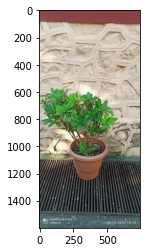

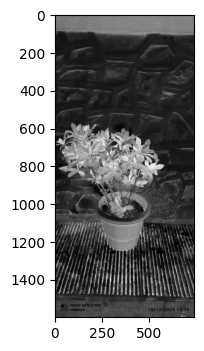

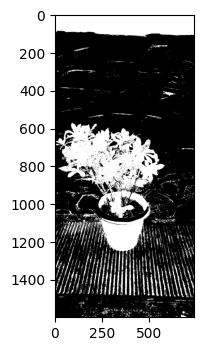

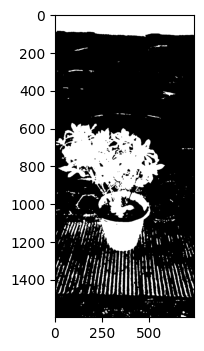

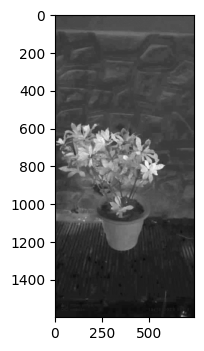

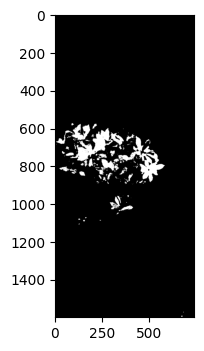

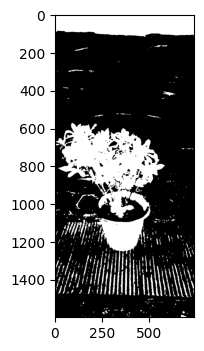

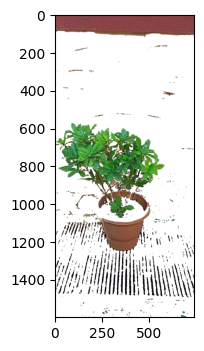

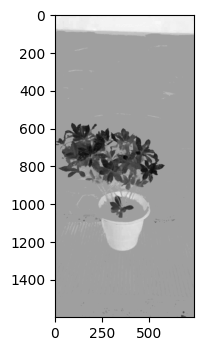

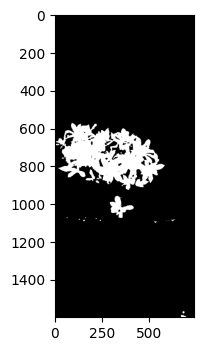

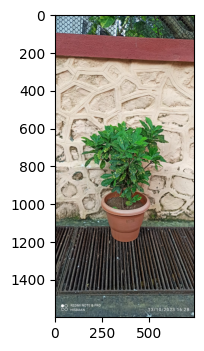

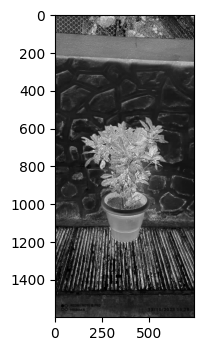

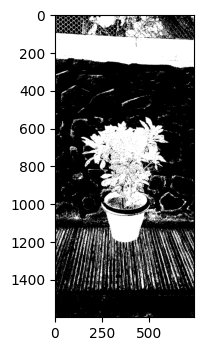

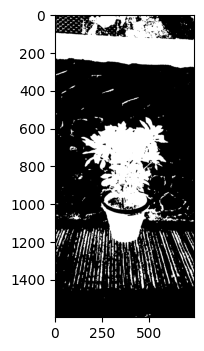

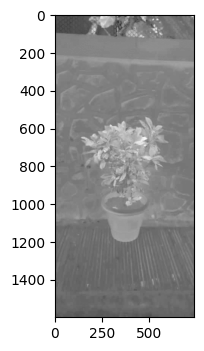

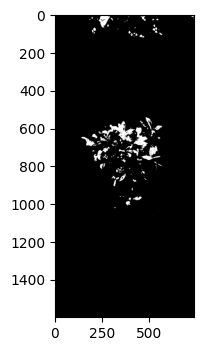

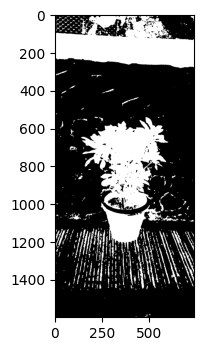

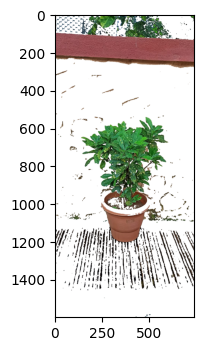

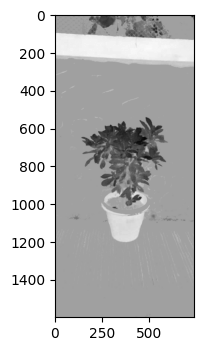

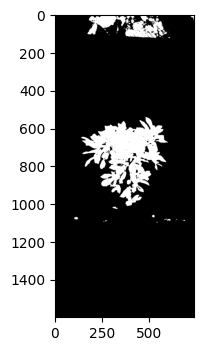

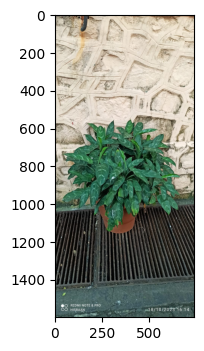

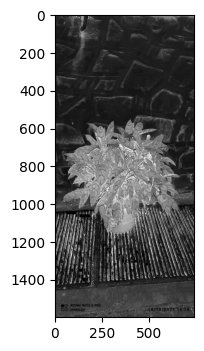

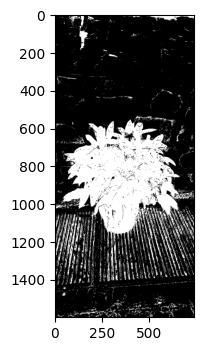

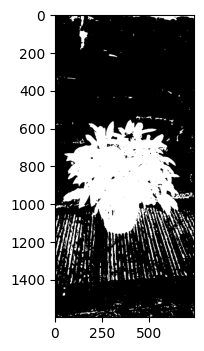

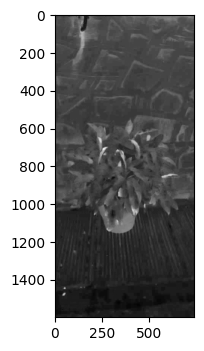

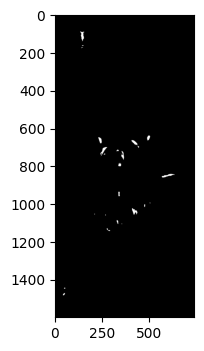

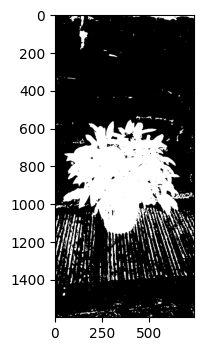

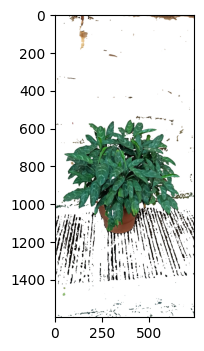

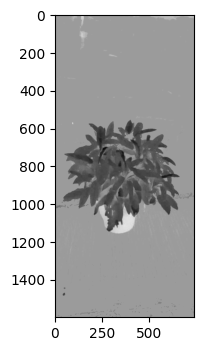

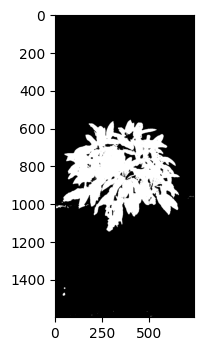

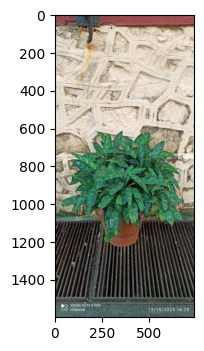

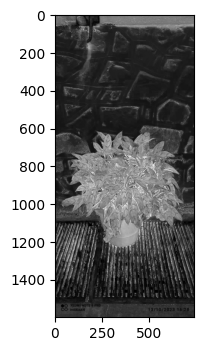

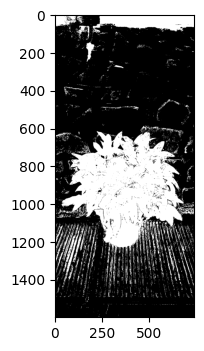

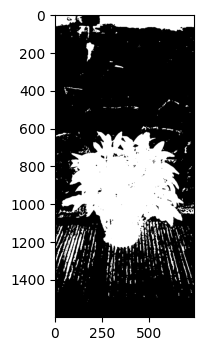

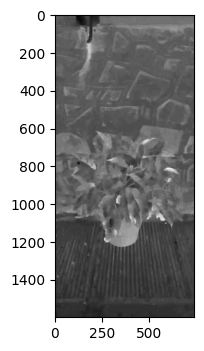

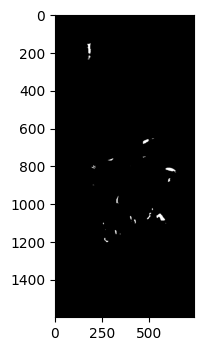

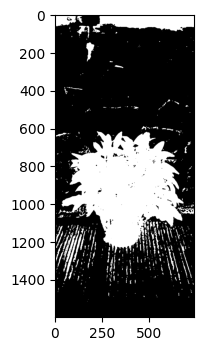

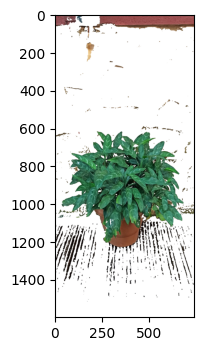

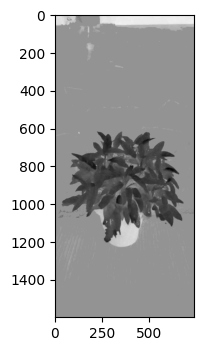

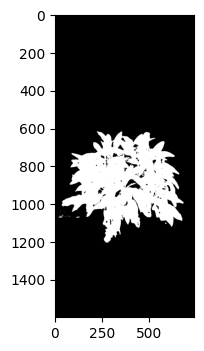

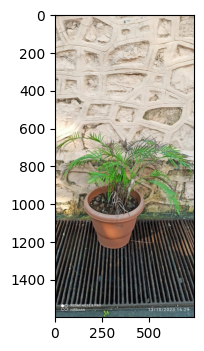

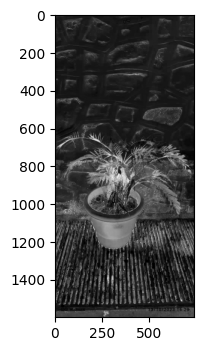

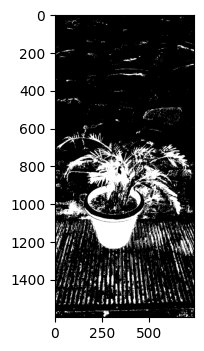

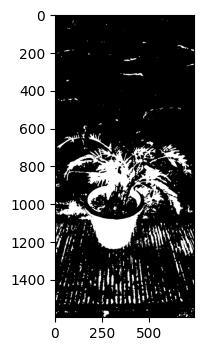

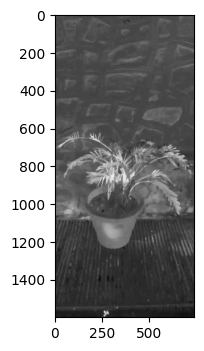

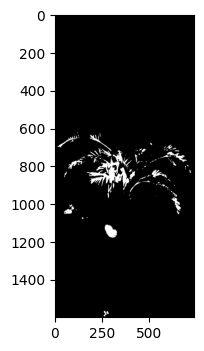

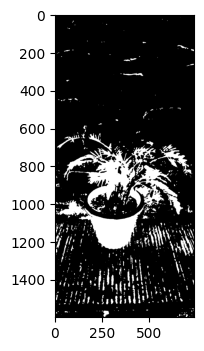

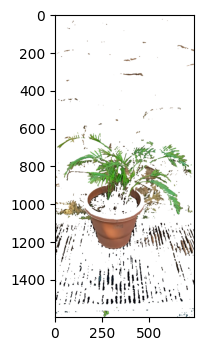

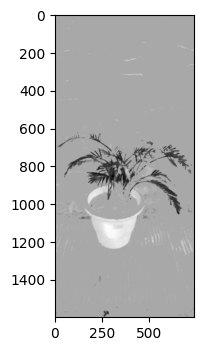

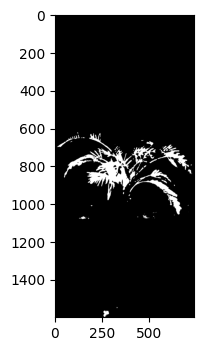

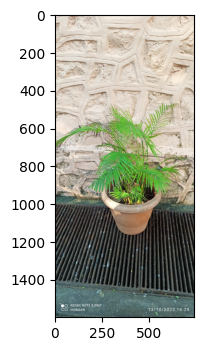

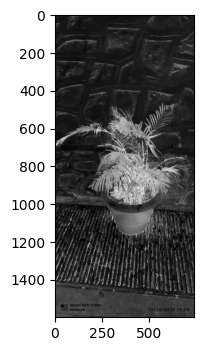

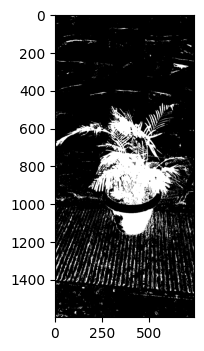

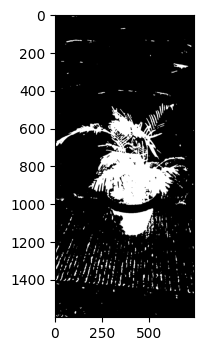

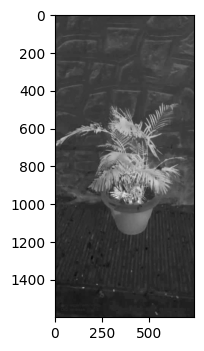

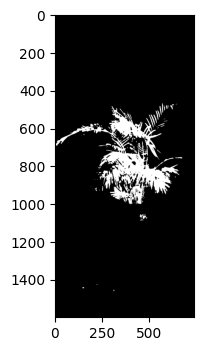

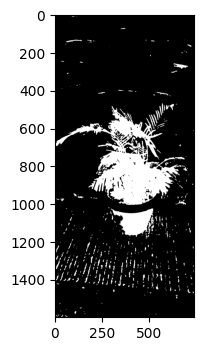

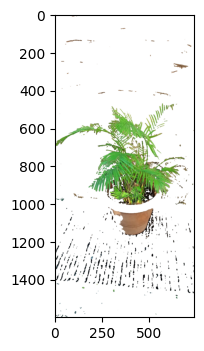

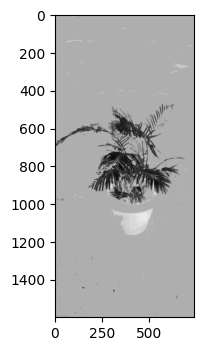

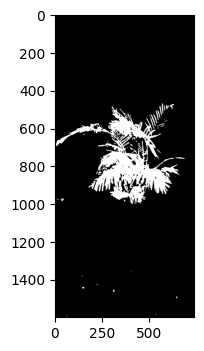

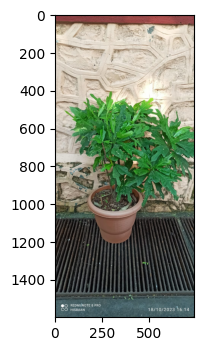

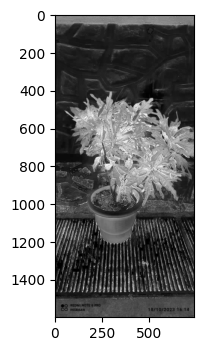

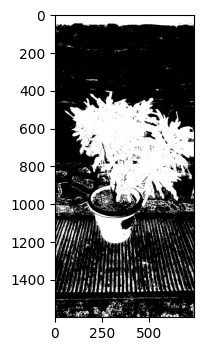

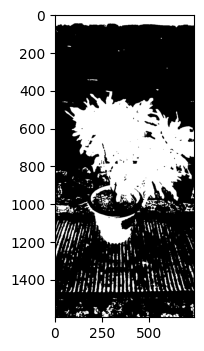

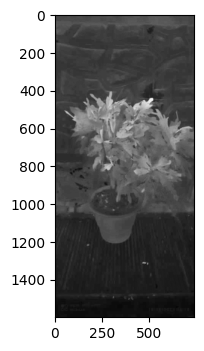

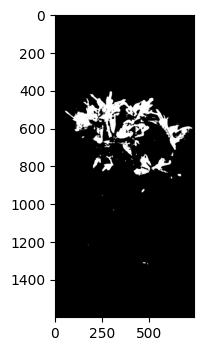

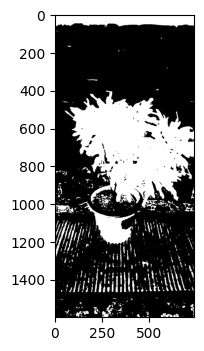

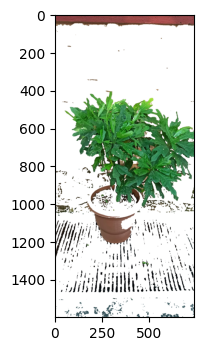

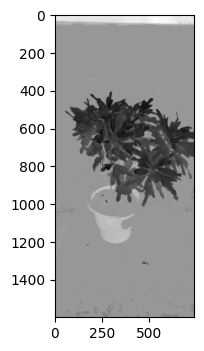

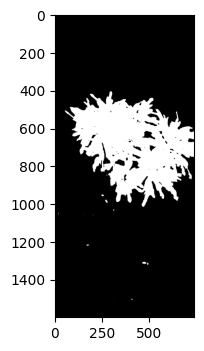

In [4]:
import os
import cv2
from plantcv import plantcv as pcv

class Options:
    def __init__(self):
        self.debug = "plot"
        self.writeimg = False
        self.result = "results.json"
        self.outdir = "."

args = Options()

pcv.params.debug = args.debug

input_folder = "collected_data"
output_folder = "masked_collected_data"

jpg_files = [f for f in os.listdir(input_folder) if f.lower().endswith('.jpg') or f.lower().endswith('.jpeg')]

for jpg_file in jpg_files:
    input_image_path = os.path.join(input_folder, jpg_file)
    output_image_path = os.path.join(output_folder, f"{jpg_file[:-4]}_mask.jpg")

    img, path, filename = pcv.readimage(filename=input_image_path)
    s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')

    s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')

    s_mblur = pcv.median_blur(gray_img=s_thresh, ksize=5)

    b = pcv.rgb2gray_lab(rgb_img=img, channel='b')

    b_thresh = pcv.threshold.binary(gray_img=b, threshold=160, max_value=255, object_type='light')

    bs = pcv.logical_or(bin_img1=s_mblur, bin_img2=b_thresh)

    masked = pcv.apply_mask(img=img, mask=bs, mask_color='white')
    masked_a = pcv.rgb2gray_lab(rgb_img=masked, channel='a')
    maskeda_thresh = pcv.threshold.binary(gray_img=masked_a, threshold=115, max_value=255, object_type='dark')

    cv2.imwrite(output_image_path, maskeda_thresh)